# SALES ANALYIS

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Merge the 12 months data sets

In [93]:
df1 = pd.read_csv('Sales_January_2019.csv')
df2 = pd.read_csv('Sales_February_2019.csv')
df3 = pd.read_csv('Sales_March_2019.csv')
df4 = pd.read_csv('Sales_April_2019.csv')
df5 = pd.read_csv('Sales_May_2019.csv')
df6 = pd.read_csv('Sales_June_2019.csv')
df7 = pd.read_csv('Sales_July_2019.csv')
df8 = pd.read_csv('Sales_August_2019.csv')
df9 = pd.read_csv('Sales_September_2019.csv')
df10 = pd.read_csv('Sales_October_2019.csv')
df11 = pd.read_csv('Sales_November_2019.csv')
df12 = pd.read_csv('Sales_December_2019.csv')


Sales_2019 = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])
Sales_2019.to_csv('Sales_2019.csv', index=False)

In [94]:
print('df1 shape', df1.shape)
print('df2 shape', df2.shape)
print('df3 shape', df3.shape)
print('df4 shape', df4.shape)
print('df5 shape', df5.shape)
print('df6 shape', df6.shape)
print('df7 shape', df7.shape)
print('df8 shape', df8.shape)
print('df9 shape', df9.shape)
print('df10 shape', df10.shape)
print('df11 shape', df11.shape)
print('df12 shape', df12.shape)
print('Sales_2019 shape', Sales_2019.shape)

df1 shape (9723, 6)
df2 shape (12036, 6)
df3 shape (15226, 6)
df4 shape (18383, 6)
df5 shape (16635, 6)
df6 shape (13622, 6)
df7 shape (14371, 6)
df8 shape (12011, 6)
df9 shape (11686, 6)
df10 shape (20379, 6)
df11 shape (17661, 6)
df12 shape (25117, 6)
Sales_2019 shape (186850, 6)


In [95]:
9723+12036+15226+18383+16635+13622+14371+12011+11686+20379+17661+25117

186850

In [96]:
df = pd.read_csv('Sales_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


#### Clean up the data

In [97]:
#drop NaN rows

nandf = df[df.isna().any(axis=1)]
nandf

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
184678,NaN,NaN,NaN,NaN,NaN,NaN
184695,NaN,NaN,NaN,NaN,NaN,NaN
185042,NaN,NaN,NaN,NaN,NaN,NaN
185729,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
df = df.dropna(how='all')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


## QN1: What was the best month for sales? How much was earned that month?

In [99]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [100]:
#Remove duplicated columns
df = df[df['Order Date'].str[0:2]!='Or']
df.shape

(185950, 6)

In [101]:
# Add Month column
df['Month'] = df['Order Date'].str[0:2].astype('int32')
#df['Month'] = df['Month'].astype('int32')
df

<ipython-input-101-7ba419e7eae4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Order Date'].str[0:2].astype('int32')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1
...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12


In [102]:
# convert columns to the correct type
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df.dtypes

<ipython-input-102-2840d0f3634d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
<ipython-input-102-2840d0f3634d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each'] = pd.to_numeric(df['Price Each'])


Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [103]:
#Total Iteam price
df['Price_Total'] = df['Quantity Ordered'] * df['Price Each']
df

<ipython-input-103-91adea3a485e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price_Total'] = df['Quantity Ordered'] * df['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Price_Total
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99
...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99


## Ans:  What was the best month for sales? How much was earned that month?

In [104]:
Result = df.groupby('Month').sum()
Result

,Quantity Ordered,Price Each,Price_Total
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


<BarContainer object of 12 artists>

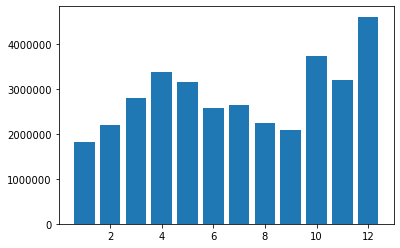

In [105]:
plt.bar(Result.index, Result.Price_Total)

## QN2: What city had the highest number of sales?

In [106]:
# Add a city column. this can be achieved by using the Apply method

df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1] )
df

<ipython-input-106-61fdcf8c0ee3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1] )


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Price_Total,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin
...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99,Dallas


In [107]:
results = df.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Price_Total
City,,,,
Atlanta,16602,2.779908e+06,104794,2.795499e+06
Austin,11153,1.809874e+06,69829,1.819582e+06
Boston,22528,3.637410e+06,141112,3.661642e+06
Dallas,16730,2.752628e+06,104620,2.767975e+06
Los Angeles,33289,5.421435e+06,208325,5.452571e+06
New York City,27932,4.635371e+06,175741,4.664317e+06
Portland,14053,2.307747e+06,87765,2.320491e+06
San Francisco,50239,8.211462e+06,315520,8.262204e+06
Seattle,16553,2.733296e+06,104941,2.747755e+06


([<matplotlib.axis.XTick at 0x1d8239cc1c0>,
 <a list of 9 Text xticklabel objects>)

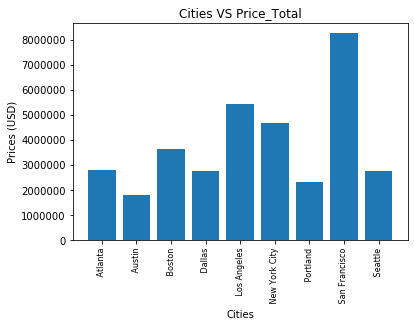

In [108]:
plt.bar(results.index, results.Price_Total)
plt.title('Cities VS Price_Total')
plt.xlabel('Cities')
plt.ylabel('Prices (USD)')
plt.xticks(results.index, rotation='vertical', size=8)

## QN3: What time should we display adverts to maximize likelihood of customers buying products?

In [109]:
#Convert the Oder Date column to a date time formart
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.dtypes

<ipython-input-109-44b4609d3ff4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'])


Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Price_Total                float64
City                        object
dtype: object

In [110]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Price_Total,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin


In [111]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df.head()

<ipython-input-111-a99044f5b083>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Order Date'].dt.hour
<ipython-input-111-a99044f5b083>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Minute'] = df['Order Date'].dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Price_Total,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin,11,59


In [112]:
results2 = df.groupby('Hour').count()
results2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Price_Total,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


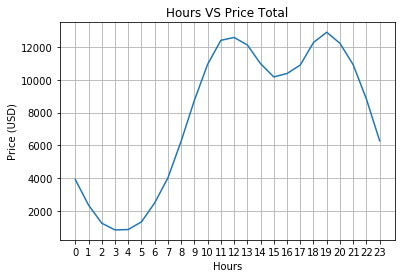

In [113]:
plt.plot(results2.index, results2.Price_Total)
plt.xlabel('Hours')
plt.ylabel('Price (USD)')
plt.xticks(results2.index)
plt.grid()
plt.title('Hours VS Price Total')
plt.show()

## QN4: What products are most often sold together?

In [114]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Price_Total,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin,11,59


In [115]:
#we capture the duplicates first.

results3 = df[df['Order ID'].duplicated(keep=False)].reset_index()
results3

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Price_Total,City,Hour,Minute
0,41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin,16,6
1,42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin,16,6
2,57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles,8,25
3,58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles,8,25
4,133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City,11,19
...,...,...,...,...,...,...,...,...,...,...,...,...
14644,186761,319584,Wired Headphones,1,11.99,2019-12-11 00:30:00,"537 Sunset St, Portland, OR 97035",12,11.99,Portland,0,30
14645,186773,319596,iPhone,1,700.00,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",12,700.00,New York City,8,44
14646,186774,319596,Lightning Charging Cable,1,14.95,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",12,14.95,New York City,8,44
14647,186809,319631,34in Ultrawide Monitor,1,379.99,2019-12-17 22:35:00,"363 Highland St, Austin, TX 73301",12,379.99,Austin,22,35


In [116]:
# We combine all the products under the same order ID into a new column (Combined)

results3['Combined'] = results3.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
results3.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Price_Total,City,Hour,Minute,Combined
0,41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin,16,6,"USB-C Charging Cable,Wired Headphones"
1,42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin,16,6,"USB-C Charging Cable,Wired Headphones"
2,57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles,8,25,"Apple Airpods Headphones,AA Batteries (4-pack)"
3,58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles,8,25,"Apple Airpods Headphones,AA Batteries (4-pack)"
4,133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City,11,19,"Vareebadd Phone,Wired Headphones"


In [117]:
# We remove repeated raws.

results3 = results3[['Order ID', 'Combined']].drop_duplicates()
results3.head()

,Order ID,Combined
0,141275,"USB-C Charging Cable,Wired Headphones"
2,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
4,141365,"Vareebadd Phone,Wired Headphones"
6,141384,"Google Phone,USB-C Charging Cable"
8,141450,"Google Phone,Bose SoundSport Headphones"


In [118]:
results3.shape

(7136, 2)

In [119]:
results3_final = results3['Combined'].value_counts(sort=True)
results3_final

iPhone,Lightning Charging Cable                              882
Google Phone,USB-C Charging Cable                            856
iPhone,Wired Headphones                                      361
Vareebadd Phone,USB-C Charging Cable                         312
Google Phone,Wired Headphones                                303
                                                            ... 
LG Washing Machine,Wired Headphones                            1
Vareebadd Phone,Wired Headphones,27in 4K Gaming Monitor        1
Macbook Pro Laptop,Flatscreen TV                               1
Google Phone,Wired Headphones,AA Batteries (4-pack)            1
Google Phone,USB-C Charging Cable,Wired Headphones,iPhone      1
Name: Combined, Length: 366, dtype: int64

In [120]:
results3_final.idxmax()

'iPhone,Lightning Charging Cable'

In [121]:
results3_final.idxmin()

'ThinkPad Laptop,34in Ultrawide Monitor'

## What product sold the most? Why do you think so?

In [122]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Price_Total,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin,11,59


In [123]:
results4 = df.groupby('Product').sum()
results4

,Quantity Ordered,Price Each,Month,Price_Total,Hour,Minute
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789


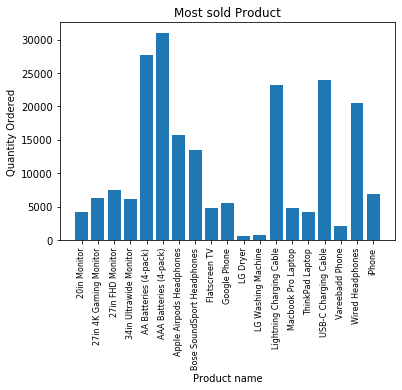

In [124]:
plt.bar(results4.index, results4['Quantity Ordered'])
plt.xticks(results4.index, rotation='vertical', size=8)
plt.xlabel('Product name')
plt.ylabel('Quantity Ordered')
plt.title('Most sold Product')
plt.show()

In [125]:
#Reason for selling the most, can be related to pricing of the product
prices = df.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [126]:
# it's evident that AAA Batteries (4-pack) is the cheapest product

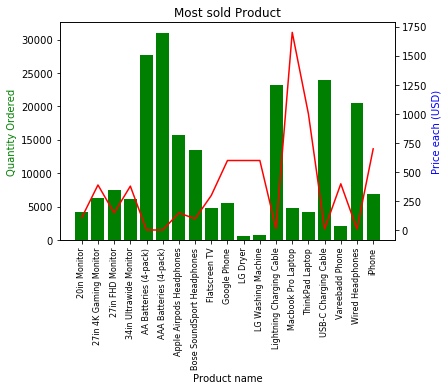

In [127]:
## Adding multiple y-axes
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(results4.index, results4['Quantity Ordered'], color='g')
ax2.plot(results4.index, prices, color='r')
ax1.set_xticklabels(results4.index, rotation='vertical', size=8)
ax1.set_xlabel('Product name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price each (USD)', color='b')
plt.title('Most sold Product')
plt.show()